In [1]:
import sys
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mod import prints, printn, printt

# 3장 - Neural Net

## 3.2 activation function

### 3.2.1 sigmoid function

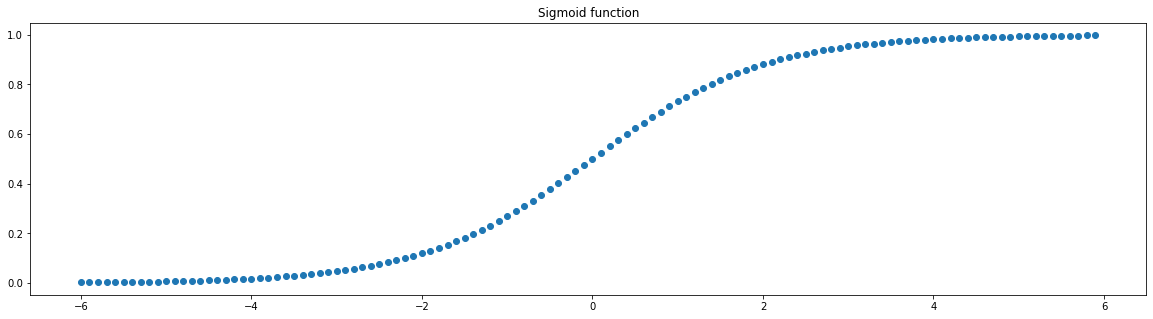

In [3]:
x = np.arange(-6, 6, .1)
plt.figure(figsize=(20, 5))
plt.scatter(x, 1/(1+np.exp(-x)))
plt.title("Sigmoid function")
plt.show()

## 3.2.2 계단 함수 구현하기

In [4]:
#변수 'stepSample' -1 <= x < 1인 np.array 데이터
stepSample = 2 * np.random.rand(100) -1
/print stepSample

(stepSample > 0).astype(np.int)

[ 0.60342305  0.57567024  0.56084158  0.94794375  0.51760915  0.15423949
  0.24597822 -0.87086317 -0.61208541 -0.22943745  0.34254378 -0.40963764
  0.89498561  0.75299688  0.48783482 -0.823236    0.35868145 -0.8677071
 -0.17087655 -0.55728331  0.2328672   0.87582944  0.20454745 -0.1207928
  0.83287223 -0.25420571 -0.29637846 -0.00109071 -0.64290029  0.22627071
  0.07110071 -0.30841045 -0.14638635 -0.78380856 -0.25931355 -0.78979837
 -0.86686098 -0.06669902  0.96690953  0.59173034 -0.86401731  0.09785132
 -0.65491398  0.04437294  0.96917997  0.34292238 -0.16511923 -0.4805935
 -0.1257334  -0.35286817  0.88577181 -0.46610637 -0.8553412  -0.57299413
 -0.02910776  0.41742323 -0.20516988  0.46367212 -0.17690534  0.86081884
 -0.59981695  0.71943787  0.14692139  0.59482772 -0.4317367  -0.90366469
  0.56025137  0.48909938 -0.08703616 -0.64673292  0.15634796  0.54865733
  0.56350217 -0.73550594  0.97724073  0.65312726 -0.6525043  -0.19039882
 -0.7674343   0.23360877 -0.73768154 -0.5728579   0.35

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [5]:
def step_function(x:list)->list:
    y = x > 0
    return y.astype(np.int)

assert step_function(np.array([0.5])) == np.array([1])
assert step_function(np.array([-0.5])) == np.array([0])

### 3.2.3 계단 함수의 그래프

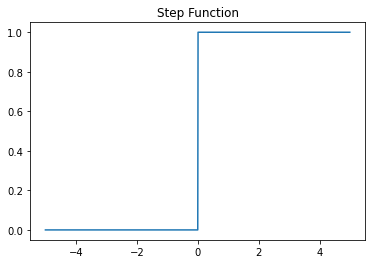

In [6]:
_x = np.arange(-5, 5, .01)
_y = step_function(_x)
plt.title("Step Function")
plt.plot(_x, _y)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

assert sigmoid(0) == 0.5
assert all(sigmoid(np.array([0, 0])) == np.array([0.5, 0.5]))

In [8]:
sigSample = 200 * np.random.rand(100) - 100

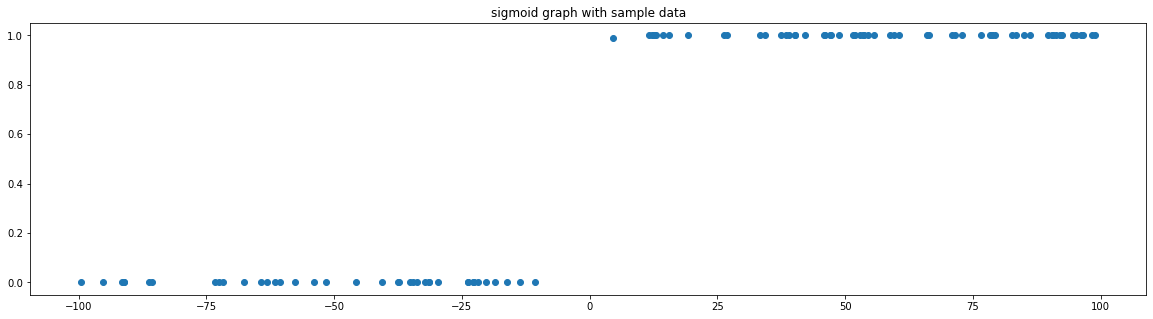

In [9]:
plt.figure(figsize=(20, 5))
plt.title("sigmoid graph with sample data")
plt.scatter(sigSample, sigmoid(sigSample))
plt.show()

### 3.2.7 ReLU 함수

In [10]:
def relu(x):
    return np.maximum(0, x)

### 3.2.5 시그모이드 함수와 계단 함수 (+ 렐루 함수) 비교

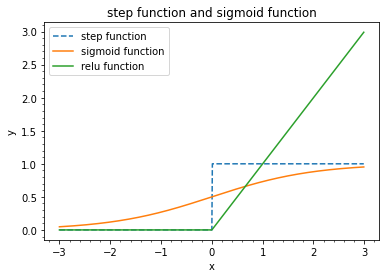

In [11]:
_x = np.arange(-3, 3, 0.01)
_sig_y = sigmoid(_x)
_step_y = step_function(_x)
_relu_y = relu(_x)

plt.plot(_x, _step_y, '--')
plt.plot(_x, _sig_y)
plt.plot(_x, _relu_y)
plt.title("step function and sigmoid function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["step function", "sigmoid function", "relu function"])
plt.xticks(np.arange(-3, 4, 1))
plt.minorticks_on()
plt.show()

### 3.4.2 각 층의 신호 전달 구현하기

In [12]:
X = np.array([1, .5])
W1 = np.array([1, 3, 5, 2, 4, 6]).reshape(2, 3)/10
B1 = np.array([1, 2, 3])/10

prints(X)
prints(W1)
prints(B1)

A1 = np.dot(X, W1) + B1
printn(A1)
prints(A1)

Z1 = sigmoid(A1)
printn(Z1)

shape-X:(2,)
shape-W1:(2, 3)
shape-B1:(3,)
A1: [0.3 0.7 1.1]
shape-A1:(3,)
Z1: [0.57444252 0.66818777 0.75026011]


In [13]:
W2 = np.array([1, 4, 2, 5, 3, 6]).reshape(3, 2)/10
B2 = np.array([1, 2])/10

prints(Z1)
prints(W2)
prints(B2)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
printn(Z2)
prints(Z2)

shape-Z1:(3,)
shape-W2:(3, 2)
shape-B2:(2,)
Z2: [0.62624937 0.7710107 ]
shape-Z2:(2,)


In [14]:
def identity_function(x):
    tmp = x
    return tmp

In [15]:
W3 = np.array([1, 3, 2, 4]).reshape(2, 2)/10
B3 = np.array([1, 2])/10
printn(W3)
printn(B3)
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
printn(Y)
prints(Y)

W3: [[0.1 0.3]
 [0.2 0.4]]
B3: [0.1 0.2]
A3: [0.31682708 0.69627909]
shape-A3:(2,)


### 3.4.3 구현 정리

In [16]:
def init_network():
    network = {}
    network['W1'] = np.array([1, 3, 5, 2, 4, 6]).reshape(2, 3)/10
    network['B1'] = np.array([1, 2, 3])/10
    network['W2'] = np.array([1, 4, 2, 5, 3, 6]).reshape(3, 2)/10
    network['B2'] = np.array([1, 2])/10
    network['W3'] = np.array([1, 3, 2, 4]).reshape(2, 2)/10
    network['B3'] = np.array([1, 2])/10
    return network

In [17]:
def forward(network:dict, x:list)->list:
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

x = np.array([1, .5])
network = init_network()
y = forward(network, np.array([1, .5]))
printn(y)

y: [0.31682708 0.69627909]


## 3.5 출력층 설계하기

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [18]:
def _softmax(y:list)->list:
    return np.exp(y)/np.exp(y).sum()

In [19]:
testArr = np.array([1010, 1000, 990])
try:
    _softmax(testArr)
except:
    /print "softmax 함수 호출에 실패하였습니다."
    pass

<ipython-input-18-0a76ee9802e0>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(y)/np.exp(y).sum()
<ipython-input-18-0a76ee9802e0>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(y)/np.exp(y).sum()


In [20]:
_softmax(testArr - np.max(testArr))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

[1 2 3 4 5 6 7 8 9]
[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03]


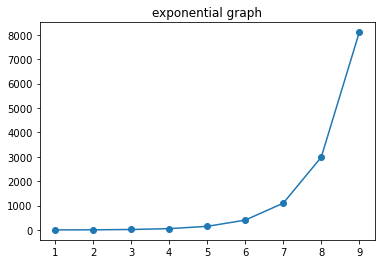

In [21]:
_x = np.arange(1, 10, 1)
/print _x
_y = np.exp(_x)
/print _y
plt.scatter(_x, _y)
plt.plot(_x, _y)
plt.title("exponential graph")
plt.show()

In [44]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    exp_sum = np.sum(exp_a)
    y = exp_a / exp_sum
    if(y.sum() != 1):
        print("softmax function ERROR")
        return -99999999
    return y

In [45]:
softmax(np.array([0.3, 2.9, 4]))

array([0.01821127, 0.24519181, 0.73659691])

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [55]:
f = open("sample_weight.pkl", 'rb')
import pickle
network = pickle.load(f)

In [56]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])